PDF

In [105]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy import stats
import math
from functools import partial

In [163]:
class Probability_Distribution_Function_AND_New_Function(object):
    def __init__(self, mu=0, sigma=1, length = 1000):
        self.mean = mu
        self.standard_deviation = sigma
        self.length = length
        self.data = []
        self.data2 = []
        self.init_data(addition_data = "false")
        self.calculate_mean()
        self.calculate_standard_deviation()

        
    def init_data(self, addition_data = "false"):
        if addition_data == "false":
            self.data = np.random.normal(loc=self.mean,scale=self.standard_deviation,size=(self.length,1))
        else:
            self.data = np.random.normal(loc=self.mean,scale=self.standard_deviation,size=(self.length,1))
            self.data2 = np.random.normal(loc=self.mean+40,scale=self.standard_deviation,size=(self.length-2000,1))

    
    def calculate_mean(self):
        self.mean = sum(self.data) // len(self.data)
        return self.mean

    
    def calculate_standard_deviation(self,sample=True):
        if sample:
            n = len(self.data) - 1 
        else:
            n = len(self.data)
        mean = self.mean
        sigma = 0
        for el in self.data:
            sigma += (el - mean)**2
        sigma = math.sqrt(sigma / n)
        self.standard_deviation = sigma
        return self.standard_deviation
    
    def plot_graphs(self):
        fig, ax0 = plt.subplots(ncols=1, nrows=1)
        (values, bins, _) = ax0.hist(self.data,bins=100,density=True,label="Histogram of samples")
        ax0.plot(self.data, np.zeros(self.data.shape), 'b+',color='red', ms=12)
        bin_centers = 0.5*(bins[1:] + bins[:-1])
        pdf = self.probability_distribution_function(bin_centers)
        kde1 = stats.gaussian_kde(bins)
        ax0.plot(bin_centers, pdf, label="PDF",color='black')
        ax0.legend()
        ax0.set_title('PDF of samples from numpy.random.normal()')
        
        
        
        
    def create_additional_pdf(self):
        self.init_data(addition_data = "true")
        

    def binolial_graph(self):
        fig, ax0 = plt.subplots(ncols=1, nrows=1)
        self.create_additional_pdf()
        self.data = np.concatenate([self.data ,self.data2])
        
        
        (values, bins, _) = ax0.hist(self.data,bins=100,density=True,label="Histogram of samples")
        ax0.plot(self.data, np.zeros(self.data.shape), 'b+',color='red', ms=12)
        bin_centers = 0.5*(bins[1:] + bins[:-1])
        
        bimodal_pdf = pdf(x_eval, loc=loc1, scale=scale1) * float(size1) / x2.size + \ 
        pdf(x_eval, loc=loc2, scale=scale2) * float(size2) / x2.size
        
        pdf = self.probability_distribution_function(bin_centers)
        kde1 = stats.gaussian_kde(bins)
        ax0.plot(bin_centers, pdf, label="PDF",color='black')
        ax0.legend()
        ax0.set_title('PDF of samples from numpy.random.normal()')
           
    def probability_distribution_function(self, x):
        return (1.0 / (self.standard_deviation * np.sqrt(2*math.pi))) * np.exp(-0.5*((x - self.mean) / self.standard_deviation) ** 2)


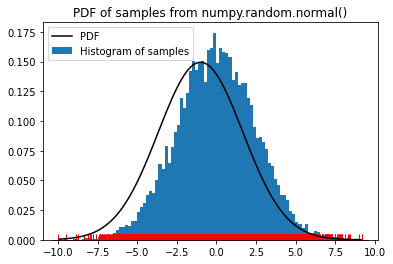

In [164]:
pdf_class = Probability_Distribution_Function_AND_New_Function(0,2.5,10000)
pdf_class.plot_graphs()

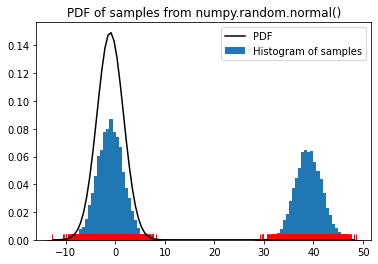

In [165]:
pdf_class.binolial_graph()